# Theory

# KNN (K Nearest Neighbor)
1. A classification or a regression model. For classification, it model that classifies input X by measuring the distance between X and the rest of the known inputs and then classifying X based on the shortest distance between. For regression, it averages the value of each cluster, and gives the avg of the closest cluster to the input.
2. This meassured distance could be "Eucledian" or "Manthatten" distances 
3. The known inputs are clusters of K inputs. I choose this K myself. 
###### 4. If I set K to 1, Overfitting occurs. If I set K to N "number of the whole dataset entries", underfitting occurs, 


##### Cross validation: This is a method where I make my model get trained and validated by all input data. Data is split to training and validatidation X different times to validate that the "Variance" is low. This prevents us from having to split data to train and validation. We use all data in training  

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.max_columns = None

In [8]:
df = pd.read_csv("mushrooms.csv")

# Data Processing

### 1- Understand Data

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [10]:
cols = df.columns.tolist()
cols.pop(0)
cols.append('class')
df = df[cols]

### 2- Datatypes

- **Check for Dtpyes**

In [11]:
pd.DataFrame(df.dtypes).T

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object


- **Modify Data Types**

In [12]:
df = df.astype("category")

- **Check after Modifying Data Types**

In [13]:
pd.DataFrame(df.dtypes).T

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category


### 3- Null Values

In [14]:
pd.DataFrame(df.isnull().sum()).T

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4- Visualizatoin

cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,48.0,32.0,624.0,1032.0,1264.0,56.0,16.0,16.0,720.0,400.0
p,120.0,12.0,876.0,808.0,1020.0,88.0,0.0,0.0,320.0,672.0


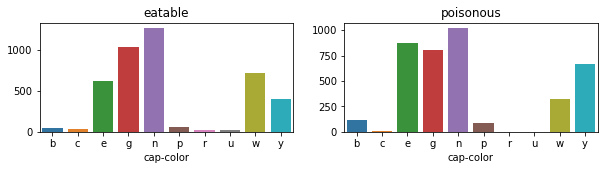

In [15]:
agg = df.pivot_table(index='class', columns='cap-color', aggfunc=len)['bruises']
agg.fillna(0, inplace=True)
display(agg)

e = agg.iloc[0]
p = agg.iloc[1]

plt.figure(figsize=(10, 2))

plt.subplot(1, 2, 1)

sns.barplot(x=e.index, y=e.values)
plt.title("eatable")

plt.subplot(1, 2, 2)
sns.barplot(x=p.index, y=p.values)
plt.title("poisonous")

plt.show()

cap-shape,b,c,f,k,s,x
class,,,,,,
e,404.0,0.0,1596.0,228.0,32.0,1948.0
p,48.0,4.0,1556.0,600.0,0.0,1708.0


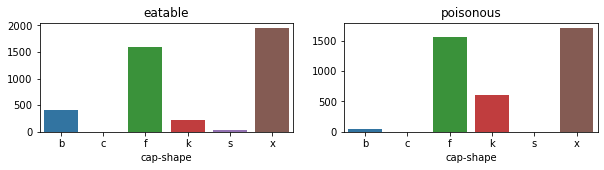

cap-surface,f,g,s,y
class,,,,
e,1560.0,0.0,1144.0,1504.0
p,760.0,4.0,1412.0,1740.0


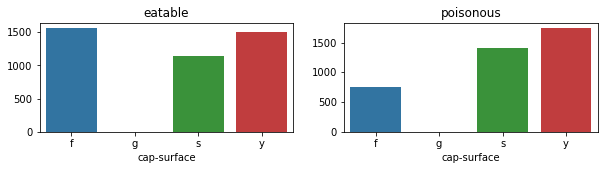

cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,48.0,32.0,624.0,1032.0,1264.0,56.0,16.0,16.0,720.0,400.0
p,120.0,12.0,876.0,808.0,1020.0,88.0,0.0,0.0,320.0,672.0


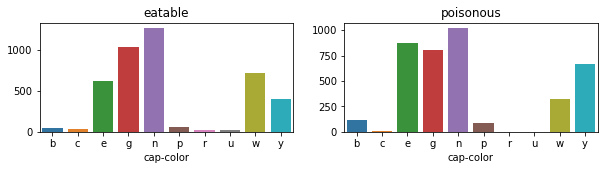

bruises,f,t
class,,
e,1456,2752
p,3292,624


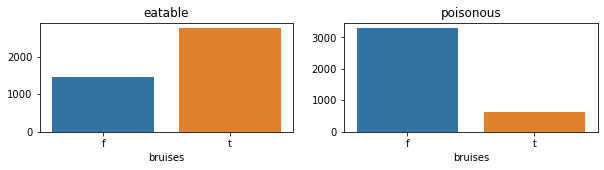

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,400.0,0.0,0.0,400.0,0.0,3408.0,0.0,0.0,0.0
p,0.0,192.0,2160.0,0.0,36.0,120.0,256.0,576.0,576.0


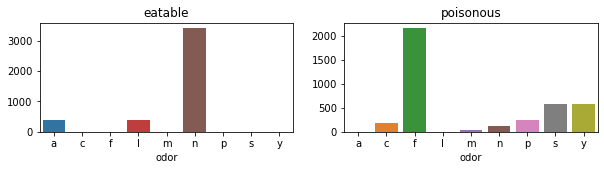

gill-attachment,a,f
class,,
e,192,4016
p,18,3898


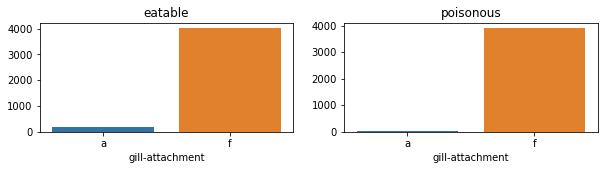

gill-spacing,c,w
class,,
e,3008,1200
p,3804,112


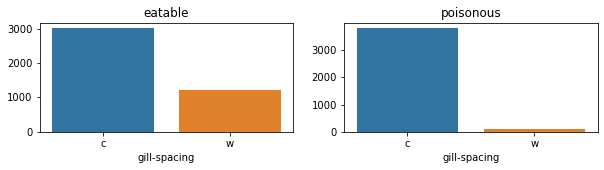

gill-size,b,n
class,,
e,3920,288
p,1692,2224


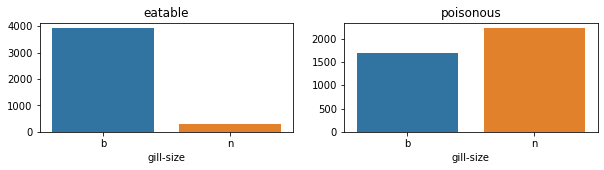

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0.0,96.0,248.0,204.0,344.0,936.0,64.0,852.0,0.0,444.0,956.0,64.0
p,1728.0,0.0,504.0,528.0,64.0,112.0,0.0,640.0,24.0,48.0,246.0,22.0


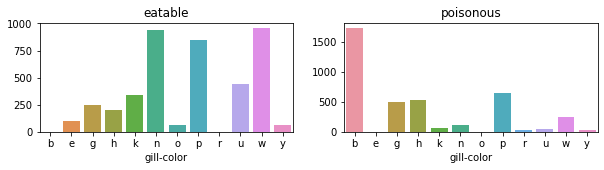

stalk-shape,e,t
class,,
e,1616,2592
p,1900,2016


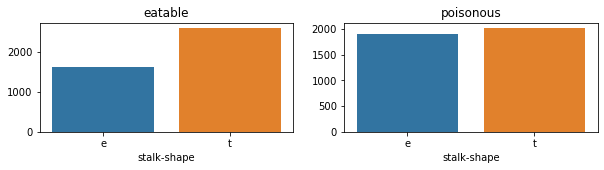

stalk-root,?,b,c,e,r
class,,,,,
e,720.0,1920.0,512.0,864.0,192.0
p,1760.0,1856.0,44.0,256.0,0.0


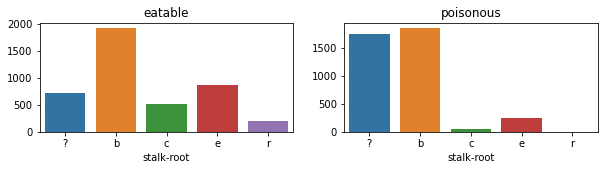

stalk-surface-above-ring,f,k,s,y
class,,,,
e,408,144,3640,16
p,144,2228,1536,8


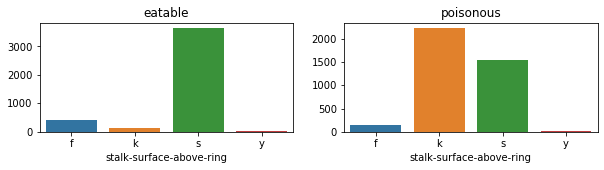

stalk-surface-below-ring,f,k,s,y
class,,,,
e,456,144,3400,208
p,144,2160,1536,76


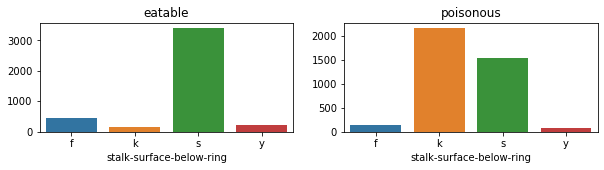

stalk-color-above-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.0,0.0,96.0,576.0,16.0,192.0,576.0,2752.0,0.0
p,432.0,36.0,0.0,0.0,432.0,0.0,1296.0,1712.0,8.0


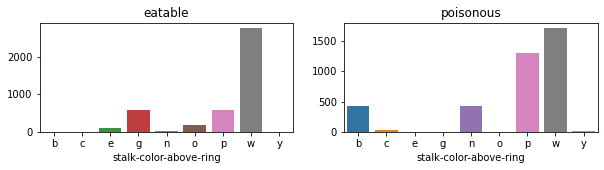

stalk-color-below-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.0,0.0,96.0,576.0,64.0,192.0,576.0,2704.0,0.0
p,432.0,36.0,0.0,0.0,448.0,0.0,1296.0,1680.0,24.0


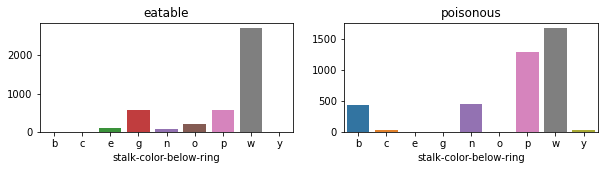

veil-type,p
class,
e,4208
p,3916


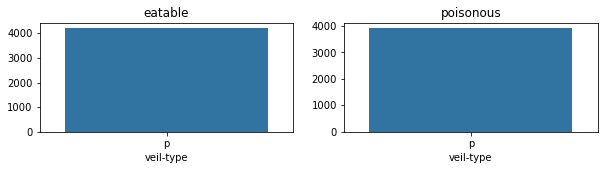

veil-color,n,o,w,y
class,,,,
e,96.0,96.0,4016.0,0.0
p,0.0,0.0,3908.0,8.0


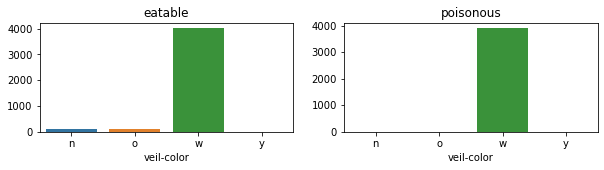

ring-number,n,o,t
class,,,
e,0.0,3680.0,528.0
p,36.0,3808.0,72.0


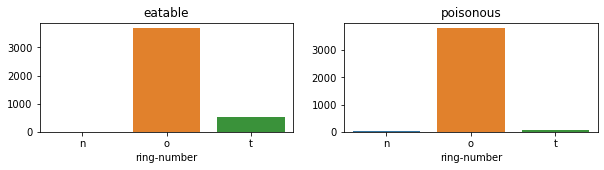

ring-type,e,f,l,n,p
class,,,,,
e,1008.0,48.0,0.0,0.0,3152.0
p,1768.0,0.0,1296.0,36.0,816.0


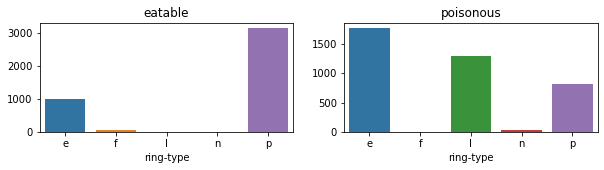

spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,48.0,48.0,1648.0,1744.0,48.0,0.0,48.0,576.0,48.0
p,0.0,1584.0,224.0,224.0,0.0,72.0,0.0,1812.0,0.0


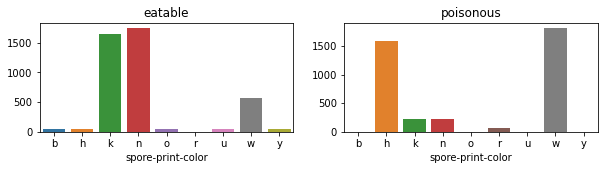

population,a,c,n,s,v,y
class,,,,,,
e,384.0,288.0,400.0,880.0,1192.0,1064.0
p,0.0,52.0,0.0,368.0,2848.0,648.0


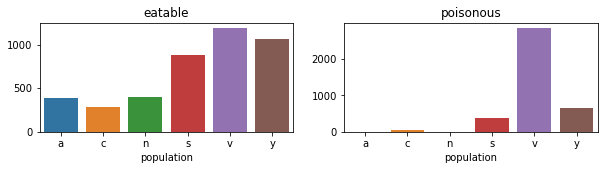

habitat,d,g,l,m,p,u,w
class,,,,,,,
e,1880.0,1408.0,240.0,256.0,136.0,96.0,192.0
p,1268.0,740.0,592.0,36.0,1008.0,272.0,0.0


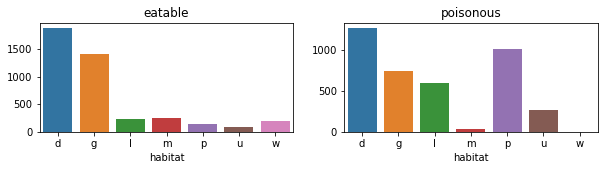

In [16]:
s1 = "bruises"
s2 = "odor"
for col in df.columns[:-1]:
    if col == s1:
        tmp = s1
        s1 = s2
        s2 = tmp
    agg = df.pivot_table(index='class', columns=col, aggfunc=len)[s1]
    agg.fillna(0, inplace=True)
    display(agg)

    e = agg.iloc[0]
    p = agg.iloc[1]

    plt.figure(figsize=(10, 2))

    plt.subplot(1, 2, 1)

    sns.barplot(x=e.index, y=e.values)
    plt.title("eatable")

    plt.subplot(1, 2, 2)
    sns.barplot(x=p.index, y=p.values)
    plt.title("poisonous")

    plt.show()
    print("=========================")

In [17]:
cols_to_drop = "veil-color veil-type gill-attachment".split()
df.drop(cols_to_drop, axis=1, inplace=True)

### 5- Duplicates

In [18]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

114
0


### 6- Data Split

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)

### 7- Encoding

In [21]:
d = pd.DataFrame(X.nunique()).T
display(d)
z = d.iloc[0]
ordinal_cols = z[z == 2].index.tolist()
oneHot_cols = z[(z > 2) & (z<=10)].index.tolist()
binary_cols = z[z>10].index.tolist()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,6,4,10,2,9,2,2,12,2,5,4,4,9,9,3,5,9,6,7


- **Oridinal Encoding**

In [22]:
from category_encoders import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(cols=ordinal_cols)
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

- **OneHot Encoding**

In [23]:
from category_encoders import OneHotEncoder
onehot_encoder = OneHotEncoder(cols=oneHot_cols)
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

- **Binary Encoding**

In [24]:
from category_encoders import BinaryEncoder
bainary_encoder = BinaryEncoder(cols=binary_cols)
bainary_encoder.fit(X_train)
X_train = bainary_encoder.transform(X_train)
X_test = bainary_encoder.transform(X_test)

- **Label Encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train["class"])
y_train["class"] = encoder.transform(y_train["class"])
y_test["class"] = encoder.transform(y_test["class"])

# KNN model

In [28]:
from sklearn.neighbors import KNeighborsClassifier


In [32]:
model = KNeighborsClassifier(n_neighbors=3)

In [33]:
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
from sklearn.metrics import classification_report
y_train_pred = model.predict(X_train)
cls_report = classification_report(y_train , y_train_pred) #first srgument is the actual value and second argument is the prediction 
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3288
           1       1.00      1.00      1.00      3120

    accuracy                           1.00      6408
   macro avg       1.00      1.00      1.00      6408
weighted avg       1.00      1.00      1.00      6408



NameError: name 'model' is not defined

- **Evaluatoin**

In [ ]:
from sklearn.metrics import accuracy_score 
y_train_pred = model.predict(X_train)
accuracy_score(y_train, y_train_pred)

# Final Evaluation

In [ ]:
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)